In [1]:
from MLimports2 import *
exec(MLimports())


from copy import copy
from scipy import stats
from sklearn import metrics,neighbors,preprocessing
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import precision_score
from sklearn.metrics import r2_score,mean_squa

In [3]:
# from tpot import TPOTClassifier
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# import numpy as np

# iris = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(iris.data.astype(np.float64),
#     iris.target.astype(np.float64), train_size=0.75, test_size=0.25, random_state=42)


# tpot.export('tpot_iris_pipeline.py')

In [4]:
# 1. Predict the class of the incident (using optimal threshold)
# 2. Gather data on either short or long-term incidents to train regression model
# 3. Use cross-validation, where this performed for each fold.
# (but find optimal models first - 1) to predict class 2) to predict duration within class

In [5]:
# 1. Find the best model (hyper-parameters) for classification
# 2. Find the best models (hyper-parameters) for regression of short term incidents and long-term incidents
# 3. Find the best overall model

# 10-fold cross-validation
#     1. Train on train-set and perform classification (divide incidents into two groups)
#     2. Use best model hyper-parameters to train regression model A-A, use samples based on the predicted duration
#     3. Use best model hyper-parameters to train regression model B-B, use samples based on the predicted duration
#     4. Collect predictions and estimate metrics

In [6]:
# use 10% as the test set
# 80% train and 10% validation

In [2]:
tpotcla_config = {    
    
    'sklearn.linear_model.LogisticRegression': {
        'penalty': ["l1", "l2"],
        'C': [1e-4, 1e-3, 1e-2, 1e-1, 0.5, 1., 5., 10., 15., 20., 25.],
        'dual': [True, False]
    },
    
    'sklearn.ensemble.RandomForestClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf':  range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.ensemble.GradientBoostingClassifier': {
        'n_estimators': [100],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'max_depth': range(1, 10),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'subsample': np.arange(0.05, 1.01, 0.05),
        'max_features': np.arange(0.05, 1.01, 0.05)
    },
        'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 10),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'n_jobs': [1],
        'verbosity': [0]
    },
}


tpotreg_config = {    

    'sklearn.ensemble.GradientBoostingRegressor': {
        'n_estimators': [100],
        'loss': ["ls", "lad", "huber", "quantile"],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'max_depth': range(1, 10),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'subsample': np.arange(0.05, 1.01, 0.05),
        'max_features': np.arange(0.05, 1.01, 0.05),
        'alpha': [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
    },
    
    'sklearn.ensemble.RandomForestRegressor': {
        'n_estimators': [100],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.linear_model.RidgeCV': {
    },

    'xgboost.XGBRegressor': {
        'n_estimators': [100],
        'max_depth': range(1, 10),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'n_jobs': [1],
        'verbosity': [0],
        'objective': ['reg:squarederror']
    },
}

from tpot import TPOTRegressor

In [67]:
X,Y = getBFS(part=[2,-1],dataset='m')
X = X.values

tpot = TPOTRegressor(generations=5, cv=10,template='Regressor',population_size=80, verbosity=2, n_jobs=30,random_state=42, scoring='neg_mean_squared_error',config_dict=tpotreg_config)
tpot.fit(X,np.log1p(Y))
# print(tpot.score(X,Y))
bestfullreg = tpot.fitted_pipeline_[0]

Optimization Progress:   0%|          | 0/480 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.9321262121765944

Generation 2 - Current best internal CV score: -0.9321262121765944

Generation 3 - Current best internal CV score: -0.9302253442844158

Generation 4 - Current best internal CV score: -0.9302253442844158

Generation 5 - Current best internal CV score: -0.9302253442844158

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.2, min_samples_leaf=7, min_samples_split=7, n_estimators=100)


In [68]:
X,Y = getBFS(part=[2,45],dataset='m')
X = X.values

tpot = TPOTRegressor(generations=5, cv=10, template='Regressor',population_size=80, verbosity=2, n_jobs=30,random_state=42, scoring='neg_mean_squared_error',config_dict=tpotreg_config)
tpot.fit(X,np.log1p(Y))
# print(tpot.score(X,Y))
bestAreg = tpot.fitted_pipeline_[0]

Optimization Progress:   0%|          | 0/480 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.47396751895249284

Generation 2 - Current best internal CV score: -0.4738674033383584

Generation 3 - Current best internal CV score: -0.47145890692244413

Generation 4 - Current best internal CV score: -0.47145890692244413

Generation 5 - Current best internal CV score: -0.47020932464956644

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.99, learning_rate=0.1, loss=huber, max_depth=2, max_features=0.9000000000000001, min_samples_leaf=17, min_samples_split=2, n_estimators=100, subsample=1.0)


In [69]:
X,Y = getBFS(part=[45,-1],dataset='m')
X = X.values

tpot = TPOTRegressor(generations=5, cv=10, template='Regressor',population_size=80, verbosity=2, n_jobs=30,random_state=42, scoring='neg_mean_squared_error',config_dict=tpotreg_config)
tpot.fit(X,np.log1p(Y))
# print(tpot.score(X,Y))
bestBreg = tpot.fitted_pipeline_[0]

Optimization Progress:   0%|          | 0/480 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.266778491973949

Generation 2 - Current best internal CV score: -0.2660774156941762

Generation 3 - Current best internal CV score: -0.2660774156941762

Generation 4 - Current best internal CV score: -0.26565909575672053

Generation 5 - Current best internal CV score: -0.26565909575672053

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.15000000000000002, min_samples_leaf=3, min_samples_split=9, n_estimators=100)


In [70]:
from sklearn.preprocessing import binarize
X,Y = getBFS(part=[2,-1],dataset='m')
X = X.values
Ybin = binarize(Y.reshape(-1,1),threshold=45).ravel()

from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, cv=10, scoring='f1', template='Classifier',population_size=100, verbosity=2, n_jobs=30,random_state=42,config_dict=tpotcla_config)
tpot.fit(X,Ybin)
# print(tpot.score(X,Ybin))
bestfullcla = tpot.fitted_pipeline_[0]

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.48959490677407064

Generation 2 - Current best internal CV score: 0.49069298005032047

Generation 3 - Current best internal CV score: 0.49069298005032047

Generation 4 - Current best internal CV score: 0.49069298005032047

Generation 5 - Current best internal CV score: 0.49069298005032047

Best pipeline: XGBClassifier(input_matrix, learning_rate=1.0, max_depth=1, min_child_weight=19, n_estimators=100, n_jobs=1, subsample=0.3, verbosity=0)


In [72]:
from sklearn.model_selection import KFold

from sklearn.preprocessing import binarize
X,Y = getBFS(part=[2,-1],dataset='m')
X = X.values

# def quantilefold(X,Y):
#     zipped = list(zip(X,Y))
#     X = [A for A,B in sorted(zipped, key = lambda x: x[1])]
#     Y = [B for A,B in sorted(zipped, key = lambda x: x[1])]
#     X = np.array(X)
#     Y = np.array(Y)
#     return X,Y

# X,Y = quantilefold(X,Y)


Ybin = binarize(Y.reshape(-1,1),threshold=45).ravel()
Yfull = np.concatenate([Y.reshape(-1,1),Ybin.reshape(-1,1)],axis=1)

kf = KFold(n_splits=10,shuffle=True)
kf.get_n_splits(X,Yfull)

print("RMSEfull,RMSEreg,MAPEfull,MAPEreg")

RES=[]

for train_index, test_index in kf.split(X,Yfull):
    
    # reset models (since some may use iterative training)
#     bestAreg.fit([[0],[0]],[0,0])
#     bestBreg.fit([[0],[0]],[0,0])
#     bestfullreg.fit([[0],[0]],[0,0])
#     bestfullcla.fit([[0],[0]],[0,1])
#     print()
    
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Yfull[train_index], Yfull[test_index]
    
    # one regression model predictions
    reg = bestfullreg
    reg.fit(Xtr,np.log1p(Ytr[:,0]))
    Rpreds = np.expm1(reg.predict(Xte))
    RTrpreds = np.expm1(reg.predict(Xtr))
    
    #one classification model predictions
    cla = bestfullcla
    cla.fit(Xtr,Ytr[:,1])
    Cpreds = cla.predict(Xte)
    CTrpreds = cla.predict(Xtr)
    
    
    # A- and B- models try to predict
    regA = bestAreg
    regB = bestBreg
    
    As = Ytr[:,1]==0
    Bs = Ytr[:,1]==1
    regA.fit(Xtr[As],np.log1p(Ytr[As,0]))
    regB.fit(Xtr[Bs],np.log1p(Ytr[Bs,0]))
    
    Apreds = np.expm1(regA.predict(Xte))
    Bpreds = np.expm1(regB.predict(Xte))
    
    ATrpreds = np.expm1(regA.predict(Xtr))
    BTrpreds = np.expm1(regB.predict(Xtr))
    #accumulating predictions
    
    R3tr = np.concatenate([reg.predict(Xtr).reshape(-1,1), regA.predict(Xtr).reshape(-1,1), regB.predict(Xtr).reshape(-1,1), cla.predict(Xtr).reshape(-1,1)],axis=1)
    R3te = np.concatenate([reg.predict(Xte).reshape(-1,1), regA.predict(Xte).reshape(-1,1), regB.predict(Xte).reshape(-1,1), cla.predict(Xte).reshape(-1,1)],axis=1)
#     print(R3tr.shape,Ytr[:,0].shape)

    from sklearn.linear_model import RidgeCV
    
    from sklearn.tree import DecisionTreeRegressor as DTR
    full = XGBRegressor()#DTR(max_depth=4)
#     full = TPOTRegressor(generations=5, template='Regressor',population_size=40, verbosity=2, n_jobs=20,random_state=42, scoring='neg_mean_squared_error',config_dict=tpotreg_config)
    full.fit(R3tr,np.log1p(Ytr[:,0]))
#     bestfullreg.fit([[0],[0]],[0,0])
#     finalreg = bestfullreg
#     finalreg.fit(R3tr,Ytr[:,0])
    
    
    PREDS = np.expm1(full.predict(R3te))
    
    
    
    TRPREDS = []
    
    for i in range(len(Xtr)):
        
        if CTrpreds[i]==0:
            TRPREDS.append(ATrpreds[i])
            
        if CTrpreds[i]==1:
            TRPREDS.append(BTrpreds[i])
            
    TEPREDS = []
    
    for i in range(len(Xte)):
        
        if Cpreds[i]==0:
            TEPREDS.append(Apreds[i])
            
        if Cpreds[i]==1:
            TEPREDS.append(Bpreds[i])  
    TRPREDS = np.array(TRPREDS).reshape(-1,1)  
    
#     print(TRPREDS.shape)
    TEPREDS = np.array(TEPREDS).reshape(-1,1)
#     print(TEPREDS.shape)
    
    full.fit(np.concatenate([TRPREDS,CTrpreds.reshape(-1,1),ATrpreds.reshape(-1,1),BTrpreds.reshape(-1,1)],axis=1), np.log1p(Ytr[:,0]))
    PREDS = full.predict(np.concatenate([TEPREDS,Cpreds.reshape(-1,1),Apreds.reshape(-1,1),Bpreds.reshape(-1,1)],axis=1))
    PREDS = np.expm1(PREDS)
    PREDS=TEPREDS
    
    rA, rB = np.sqrt(mse(Yte[:,0],np.array(PREDS))), np.sqrt(mse(Yte[:,0],np.array(Rpreds)))
    mA, mB = mape(Yte[:,0],np.array(PREDS)), mape(Yte[:,0],np.array(Rpreds))
    rA = np.round(rA)
    rB = np.round(rB)
    mA = np.round(mA)
    mB = np.round(mB)
    print("{},{},{},{}".format(rA, rB, mA, mB))
    RES.append("{},{},{},{}".format(rA, rB, mA, mB))
#     print(PREDS[0],Rpreds[0])


print("RMSEfull,RMSEreg,MAPEfull,MAPEreg")
print("\n".join(RES))

RMSEfull,RMSEreg,MAPEfull,MAPEreg


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


77.0,71.0,205.0,143.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


71.0,68.0,180.0,114.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


66.0,65.0,204.0,126.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


73.0,68.0,250.0,139.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


75.0,72.0,197.0,128.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


65.0,61.0,203.0,124.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


79.0,76.0,226.0,128.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


72.0,66.0,195.0,117.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


78.0,74.0,206.0,132.0


/home/agrigore/.local/lib/python3.6/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


67.0,65.0,202.0,120.0
RMSEfull,RMSEreg,MAPEfull,MAPEreg
77.0,71.0,205.0,143.0
71.0,68.0,180.0,114.0
66.0,65.0,204.0,126.0
73.0,68.0,250.0,139.0
75.0,72.0,197.0,128.0
65.0,61.0,203.0,124.0
79.0,76.0,226.0,128.0
72.0,66.0,195.0,117.0
78.0,74.0,206.0,132.0
67.0,65.0,202.0,120.0


In [56]:
from sklearn.tree import plot_tree

In [71]:
plot_tree(full,max_depth=2,feature_names=['reg','regA','regB','cla'])

NotFittedError: This XGBRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [147]:
print(full[:100])

[[ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 60   1]
 [ 60   1]
 [ 30   0]
 [ 30   0]
 [120   1]
 [ 90   1]
 [ 30   0]
 [ 45   1]
 [ 60   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 30   0]
 [ 45   1]
 [ 30   0]
 [ 30   0]
 [ 75   1]
 [380   1]
 [ 90   1]
 [ 30   0]
 [ 45   1]
 [ 45   1]
 [ 90   1]
 [ 75   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 60   1]
 [ 60   1]
 [ 45   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 45   1]
 [353   1]
 [ 60   1]
 [ 45   1]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 60   1]
 [ 45   1]
 [ 30   0]
 [ 30   0]
 [ 60   1]
 [ 60   1]
 [ 60   1]
 [ 47   1]
 [ 75   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 75   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [414   1]
 [ 90   1]
 [ 90   1]
 [ 30   0]
 [ 30   0]
 [ 45   1]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]
 [ 30   0]

In [139]:
X,Y = getBFS(part=[39,-1],dataset='sf')
Y.min()

39

In [105]:
As

array([False,  True,  True,  True,  True, False, False, False,  True,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True,  True, False, False,  True, False,  True, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
        True,  True, False, False,  True, False, False, False, False,
       False, False,

In [17]:
tpot.export('tpot_iris_pipeline.py')

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=1, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=200, n_jobs=1,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.6000000000000001, tree_method='exact',
             validate_parameters=1, verbosity=0)

In [39]:
Xbase,Xte,Ybase,Yte = train_test_split(X,Y,test_size=0.1)

In [40]:
Xtr,Xva,Ytr,Yva = train_test_split(Xbase,Ybase,test_size=0.11)

In [42]:
len(Xva)

53

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -3087.5178072693934

Generation 2 - Current best internal CV score: -3087.5178072693934

Generation 3 - Current best internal CV score: -3011.0816757393454

Generation 4 - Current best internal CV score: -2968.3305589359

Generation 5 - Current best internal CV score: -2968.3305589359

Best pipeline: GradientBoostingRegressor(input_matrix, alpha=0.75, learning_rate=0.1, loss=ls, max_depth=2, max_features=0.9000000000000001, min_samples_leaf=6, min_samples_split=5, n_estimators=100, subsample=0.5)
-1653.2819865987983


In [44]:
bestfullreg = tpot.fitted_pipeline_[0]

In [124]:
zipped = list(zip(X,Y))
X = [A for A,B in sorted(zipped, key = lambda x: x[1])]
Y = [B for A,B in sorted(zipped, key = lambda x: x[1])]
X = np.array(X)
Y = np.array(Y)

In [87]:
#QUANTILED

from sklearn.model_selection import KFold

RES=[]

kf = KFold(n_splits=10,shuffle=False)

kf.get_n_splits(X,Y)
RMSEQ = []

for train_index, test_index in kf.split(X,Y):
#             print('k')
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Y[train_index], Y[test_index]
    #reg = QuantileRegressor(quantile=quantile, alpha=0)
    reg = XGBRegressor(n_estimators=150,verbosity = 0)
    reg.fit(Xtr,Ytr)
    preds = reg.predict(Xte)
    RMSEQ.append(np.sqrt(mse(Yte,preds)))
#     RMSEQ.append(mape(Yte,preds))
            
RES.append([np.mean(RMSEQ),np.std(RMSEQ)])
print(RES[-1])

[66.41859826165862, 45.843493276510266]


In [155]:
RES=[]

kf = KFold(n_splits=10,shuffle=True)

kf.get_n_splits(X,Y)
RMSEQ = []

for train_index, test_index in kf.split(X,Y):
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Y[train_index], Y[test_index]
    reg = XGBRegressor(n_estimators=350,verbosity = 0)
    reg.fit(Xtr,Ytr)
    preds = reg.predict(Xte)
    RMSEQ.append(np.sqrt(mse(Yte,preds)))


In [156]:
RMSEQ

[58.033465914479855,
 35.272086804733945,
 45.15763871358063,
 81.12830161070828,
 57.677462708625455,
 92.02634839463795,
 94.27136734291784,
 70.39178288106343,
 98.14809337183857,
 76.2484835862898]

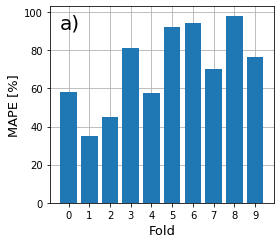

In [157]:
plt.rc('axes', axisbelow=True)
plt.figure(figsize=(4,3.5))
plt.bar(np.array(list(range(len(RMSEQ)))),RMSEQ)
plt.xlabel('Fold',fontsize=13)
plt.ylabel('MAPE [%]',fontsize=13)
plt.xticks(np.arange(0,10))
plt.text(-0.4, max(RMSEQ)*0.93, 'a)', fontsize = 20)
plt.grid()
# plt.ylim(0,90)
plt.tight_layout()
plt.savefig('A_KF.pdf')
# plt.title('10 quantiled time-folds')

In [112]:
[np.quantile(Y,A) for A in np.linspace(0.0,1,10)]

[10.0, 29.0, 29.0, 30.0, 44.0, 47.0, 72.0, 108.0, 360.0, 2715.0]

In [101]:
from sklearn.model_selection import KFold

RES=[]

kf = KFold(n_splits=10,shuffle=True)

kf.get_n_splits(X,Y)
RMSE = []


for train_index, test_index in kf.split(X,Y):
#             print('k')
    Xtr, Xte = X[train_index], X[test_index]
    Ytr, Yte = Y[train_index], Y[test_index]
    #reg = QuantileRegressor(quantile=quantile, alpha=0)
#     for i in range(10):
    reg = XGBRegressor(n_estimators=100,verbosity = 0)
    reg.fit(Xtr,Ytr)
    preds = reg.predict(Xte)
    RMSE.append(np.sqrt(mse(Yte,preds)))
            
RES.append([np.mean(RMSE),np.std(RMSE)])
print(RES[-1])

[49.95608084175136, 7.333926505347353]


In [102]:
RMSE

[49.40480450880131,
 51.73428926895006,
 47.030082339087336,
 50.65605126405232,
 42.50628689118303,
 43.62171836222986,
 46.24212844494563,
 50.87276134896721,
 70.16020917363426,
 47.33247681566265]

Text(0.5, 1.0, '10-folds')

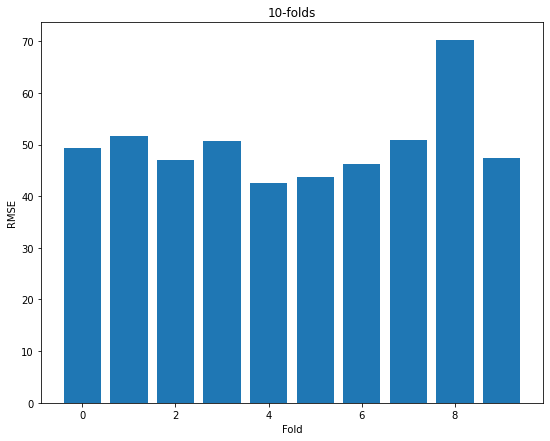

In [103]:
plt.bar(list(range(len(RMSE))),RMSE)
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.title('10-folds')

In [14]:
reg = QuantileRegressor(quantile=0.5,alpha=0.5)

In [15]:
reg.fit(X,Y)

c:\users\user\python39\lib\site-packages\sklearn\linear_model\_quantile.py:268: ConvergenceWarning: Linear programming for QuantileRegressor did not succeed.
Status is 1: Iteration limit reached.
Result message of linprog:
The iteration limit was reached before the algorithm converged.
  warnings.warn(


QuantileRegressor(alpha=0.5)